In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt

In [2]:
img_width, img_height = 150, 150
batch_size = 32
epochs = 15

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'ApplesTrain',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    'ApplesTrain',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'ApplesTest',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4539 images belonging to 3 classes.
Found 1133 images belonging to 3 classes.
Found 1779 images belonging to 3 classes.


In [4]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/15


c:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 102s 696ms/step - accuracy: 0.6942 - loss: 0.9130 - val_accuracy: 0.8632 - val_loss: 0.3280
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 100s 698ms/step - accuracy: 0.8724 - loss: 0.3368 - val_accuracy: 0.9038 - val_loss: 0.2198
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 94s 656ms/step - accuracy: 0.8985 - loss: 0.2603 - val_accuracy: 0.9047 - val_loss: 0.3156
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 97s 675ms/step - accuracy: 0.9189 - loss: 0.2274 - val_accuracy: 0.9515 - val_loss: 0.1338
Epoch 5/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 97s 675ms/step - accuracy: 0.9305 - loss: 0.1797 - val_accuracy: 0.9347 - val_loss: 0.1771
Epoch 6/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 97s 672ms/step - accuracy: 0.9450 - loss: 0.1612 - val_accuracy: 0.9453 - val_loss: 0.1354
Epoch 7/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 95s 663ms/step - accuracy: 0.9521 - loss: 0.1211 - val_accuracy: 0.9665 - val_loss: 0.0940
Epoch 8/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 95s 662ms/step - accuracy: 0.9482 - loss: 0.1304 - v

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.9894 - loss: 0.0342
Test accuracy: 0.9848229289054871


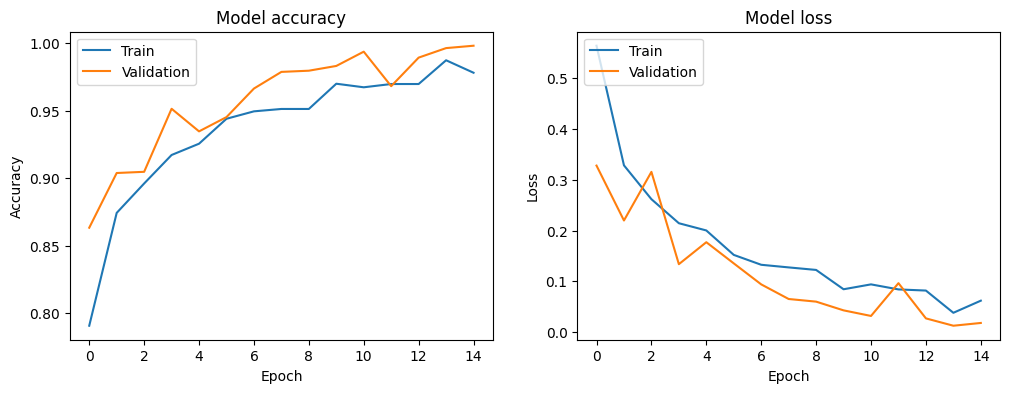

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [8]:
model.save('apple_classifier.h5')

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'testimages\golden-apple.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  
predictions = model.predict(img_array)
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
predicted_class = class_labels[np.argmax(predictions)]

print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted class: rottenapples


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,105,611 (217.84 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,070,408 (145.23 MB)